In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from pandas import DataFrame

import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

import mglearn

############################# Working directory
import os;
os.chdir("/Users/cesare.chung/int/03_RawData/1-A167081513256-CSV")
#os.chdir("/Users/cesare.chung/int/03_RawData/A167081717265-Blue")
print (os.getcwd());
############################# Reading the dataset in a dataframe using Pandas
print('Python3: Chinese characters in csv file need to be removed!!! \n')
df_B = pd.read_csv("Single_Blue_064.csv",header=None)
#df_B = df_B.loc[0:127,0:71]
############################# Summarizing and Computing Descriptive Statistics

/Users/cesare.chung/int/03_RawData/1-A167081513256-CSV
Python3: Chinese characters in csv file need to be removed!!! 



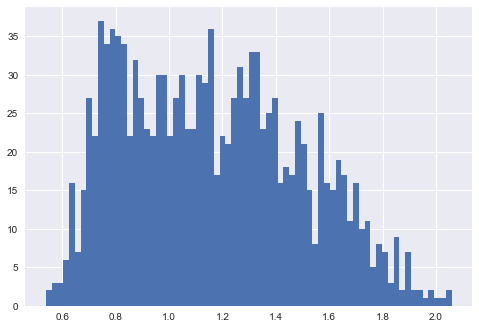

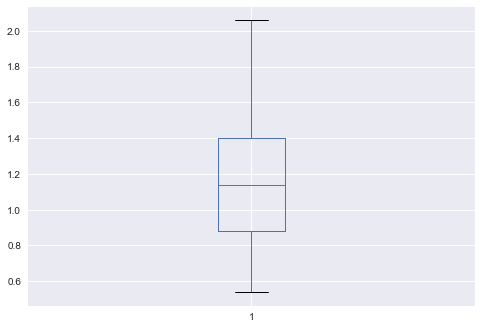

1.441889197200521

In [11]:
df_B.describe()
#
df_B.shape
df_B.size
m=len(df_B)
m
n=len(df_B.columns)
n
#
df_B.iloc[:,0:].values
df_B.iloc[:, 1].hist(bins=70)
plt.show()

df_B.boxplot(column=1)
plt.show()

#
# Return the number of missing values per column
df_B.apply(lambda x: sum(x.isnull()),axis=0) 
df_B.isnull().sum()
#
# Return the mean per column (axis=0)
df_column_mean = df_B.mean(axis=0)
#df_column_mean = df_B.mean(axis=1)
df_column_mean
# Select a cut off in order to separate data into binary
cut_off = df_column_mean.mean()
cut_off

In [12]:
#
############################# Binary data - Cesare
#
#df_B[19][22] == df_B.loc[22,19]
#
X=np.zeros((df_B.size,2))
Y=np.zeros(df_B.size)
#
for i in range(len(df_B)):
    for j in range(len(df_B.columns)):
        X[j+i*720]=[i,j]
        if df_B.loc[i,j] >= cut_off:
            Y[j+i*720]=1
        else:
            Y[j+i*720]=0
#
'''
for i in range(len(df_B)):
    for j in range(len(df_B.columns)):
        X[j+i*72]=[i,j]
        if df_B.loc[i,j] >= cut_off:
            Y[j+i*72]=1
        else:
            Y[j+i*72]=0
'''
#
X
Y
Y=Y.astype(np.integer)
#

In [13]:
#
############################# Binary data - Cesare
#
df_B_binary = df_B.copy()
df_B_binary[df_B_binary < cut_off]  = 0
df_B_binary[df_B_binary >= cut_off] = 1
#

In [14]:
#
############################# Binary data (Numpy) - James
#
raw_data = np.loadtxt("Single_Blue_064.csv", delimiter=",")
#raw_data = raw_data[0:128,0:72]

X=np.zeros((raw_data.size,2))
Y=np.zeros(raw_data.size)           
avg=np.mean(raw_data)
avg


for i in range(raw_data.shape[0]):
    for j in range(raw_data.shape[1]):
        X[j+i*720]=[i,j]
        if raw_data[i,j]>avg:
            Y[j+i*720]=1
        else:
            Y[j+i*720]=0

'''
for i in range(raw_data.shape[0]):
    for j in range(raw_data.shape[1]):
        X[j+i*72]=[i,j]
        if raw_data[i,j]>avg:
            Y[j+i*72]=1
        else:
            Y[j+i*72]=0
'''
        
print(raw_data.shape)
print(X)
print(Y)
X
Y
Y=Y.astype(np.integer)
############################# Binary data (Numpy) - James
#

(1280, 720)
[[  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   2.00000000e+00]
 ..., 
 [  1.27900000e+03   7.17000000e+02]
 [  1.27900000e+03   7.18000000e+02]
 [  1.27900000e+03   7.19000000e+02]]
[ 0.  1.  1. ...,  0.  0.  0.]


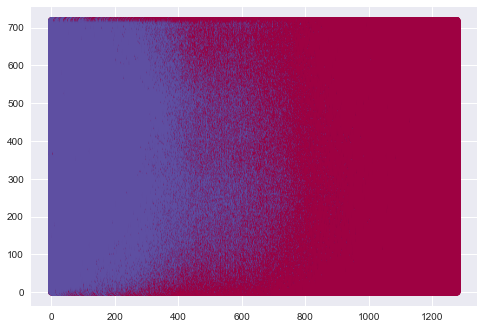

In [15]:
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)
plt.show()


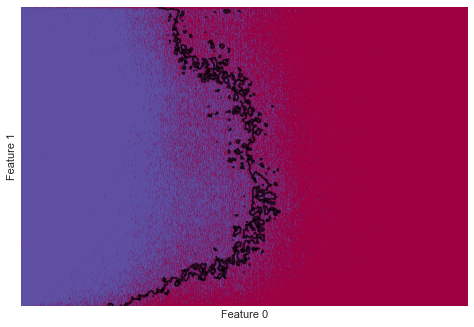

In [16]:
#
############################# Modeling 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
############################# Modeling 
#
###### KNN
#
knn = KNeighborsClassifier(n_neighbors= 100).fit(X, Y)

#mglearn.plots.plot_2d_separator(knn, X, fill=True, alpha=.7)
#mglearn.plots.plot_2d_separator(knn, X, fill=False, alpha=.7)
mglearn.plots.plot_2d_separator(knn, X, fill=False, eps=0.5,alpha=.7)
#mglearn.discrete_scatter( X[:, 0], X[:, 1], Y)
#mglearn.discrete_scatter( X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.Spectral)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#
#
plt.show()


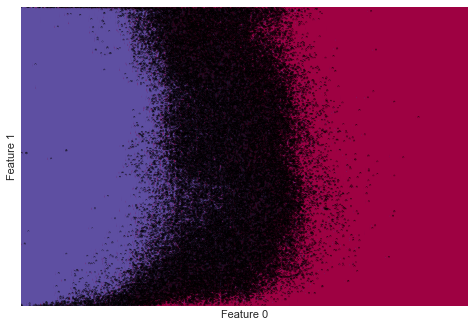

In [18]:
#
###### Random Forest
#
#forest = RandomForestClassifier(n_estimators=5,  random_state=2).fit(X, Y)
#
forest = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1).fit(X, Y)

mglearn.plots.plot_2d_separator(forest, X, fill=False, eps=0.5,alpha=.7)
#mglearn.discrete_scatter( X[:, 0], X[:, 1], Y)
plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.Spectral)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.show()
